# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('25__iris.csv', sep=",")

## Prezentacja danych
### Datafrae

In [12]:
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Początkowe wiersze w dataframe

In [4]:
df.head()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Losowe wiersze

In [6]:
df.sample(10)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
81,5.5,2.4,3.7,1.0,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
22,4.6,3.6,1.0,0.2,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica
94,5.6,2.7,4.2,1.3,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa


### Ostatnie wartości

In [7]:
df.tail()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Informacje o kolumnach

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Zbiorcze informacje o danych
Dane pogrupowane są w pięciu kolumnach, czterech liczbowych i jednej opisowej. 

In [9]:
df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

## Analiza brakujących wartości

In [15]:
df.isnull()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [17]:
df.isnull().sum()

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

### Podsumowanie brakujących wartości
Dane są kompletne, nie zawierają braków.

## Analiza pojedynczych zmiennych

array([[<Axes: title={'center': 'długość kielicha (sepal length)'}>,
        <Axes: title={'center': 'szerokość kielicha (sepal width)'}>],
       [<Axes: title={'center': 'długość płatka (petal length)'}>,
        <Axes: title={'center': 'szerokość płatka (petal width)'}>]],
      dtype=object)

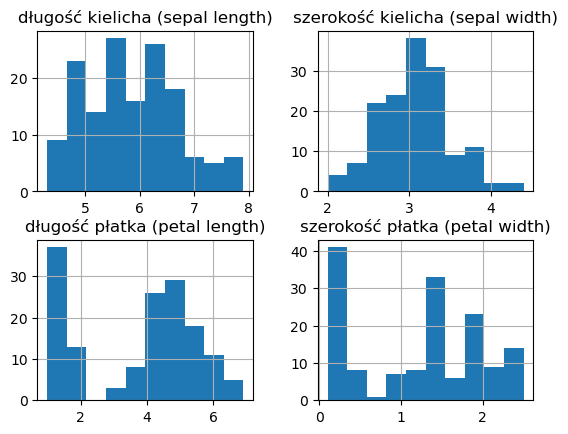

In [21]:
df.hist()

<Axes: title={'center': 'Długość kielicha'}>

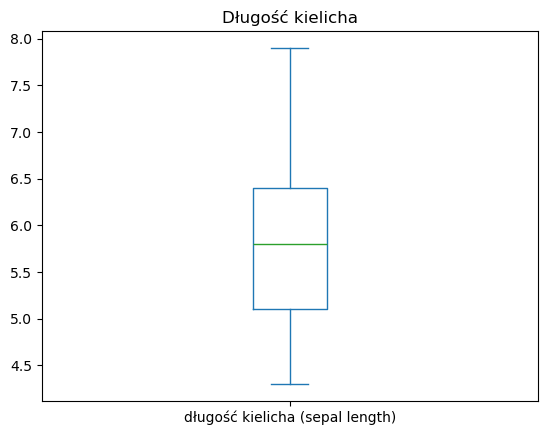

In [49]:
df['długość kielicha (sepal length)'].plot(kind='box', title='Długość kielicha')

<Axes: title={'center': 'Boxplot dla sepal_length'}>

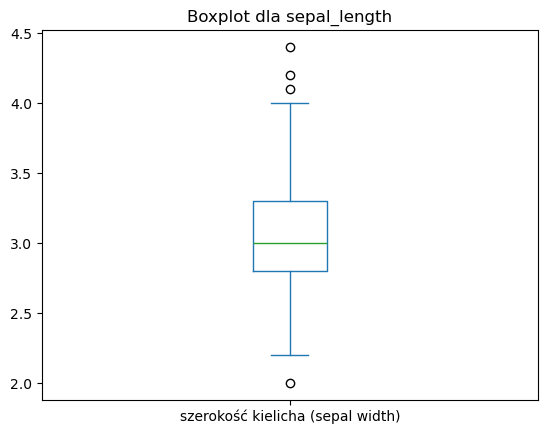

In [32]:
df['szerokość kielicha (sepal width)'].plot(kind='box', title='Szerokość kielicha')

<Axes: title={'center': 'Boxplot dla sepal_length'}>

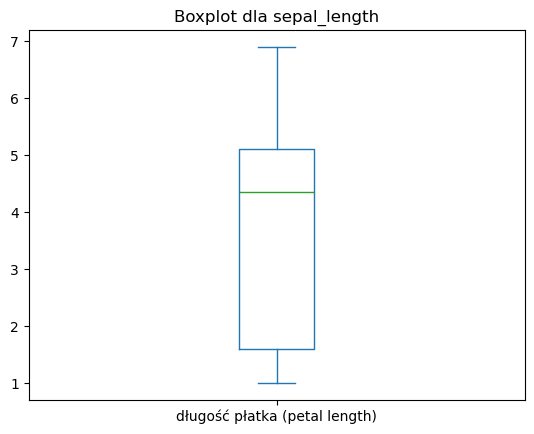

In [33]:
df['długość płatka (petal length)'].plot(kind='box', title='Długość płatka')

<Axes: title={'center': 'Boxplot dla sepal_length'}>

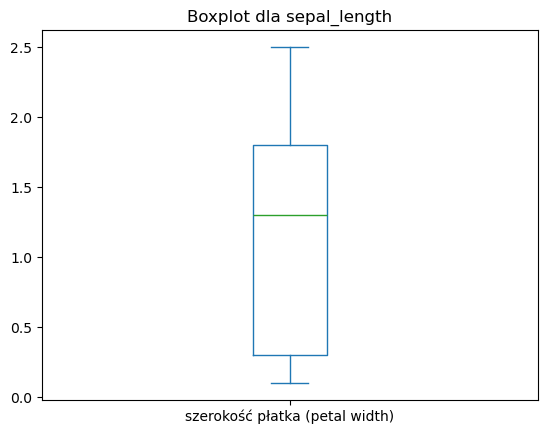

In [34]:
df['szerokość płatka (petal width)'].plot(kind='box', title='Szerokość płatka')

## Analiza zależności pomiędzy zmiennymi
### Długość kielicha, a klasa irysa

<Axes: title={'center': 'długość kielicha (sepal length)'}, xlabel='klasa (class)'>

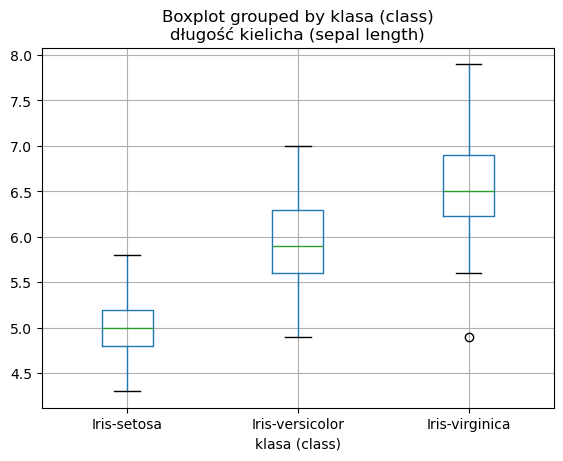

In [45]:
df.boxplot(column='długość kielicha (sepal length)', by='klasa (class)')

In [54]:
df.groupby('klasa (class)', as_index=False).agg({'długość kielicha (sepal length)': ['min', 'mean', 'median', 'max', 'std', 'count']})

klasa (class) długość kielicha (sepal length)                     \
                                               min   mean median  max   
0      Iris-setosa                             4.3  5.006    5.0  5.8   
1  Iris-versicolor                             4.9  5.936    5.9  7.0   
2   Iris-virginica                             4.9  6.588    6.5  7.9   

                   
        std count  
0  0.352490    50  
1  0.516171    50  
2  0.635880    50

### Szerokość kielicha, a klasa irysa

<Axes: title={'center': 'szerokość kielicha (sepal width)'}, xlabel='klasa (class)'>

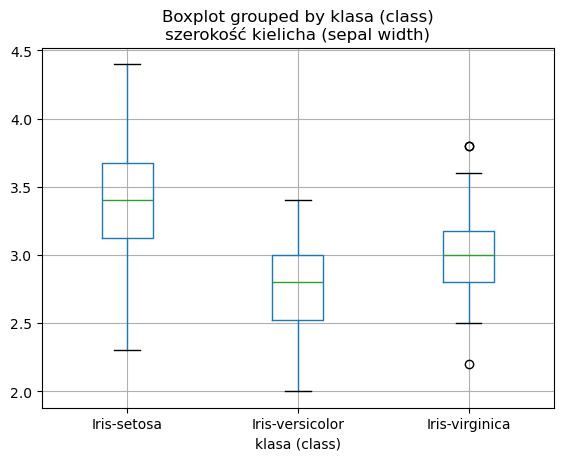

In [46]:
df.boxplot(column='szerokość kielicha (sepal width)', by='klasa (class)')

In [55]:
df.groupby('klasa (class)', as_index=False).agg({'szerokość kielicha (sepal width)': ['min', 'mean', 'median', 'max', 'std', 'count']})

klasa (class) szerokość kielicha (sepal width)                     \
                                                min   mean median  max   
0      Iris-setosa                              2.3  3.418    3.4  4.4   
1  Iris-versicolor                              2.0  2.770    2.8  3.4   
2   Iris-virginica                              2.2  2.974    3.0  3.8   

                   
        std count  
0  0.381024    50  
1  0.313798    50  
2  0.322497    50

### Długość płatka, a klasa irysa

<Axes: title={'center': 'długość płatka (petal length)'}, xlabel='klasa (class)'>

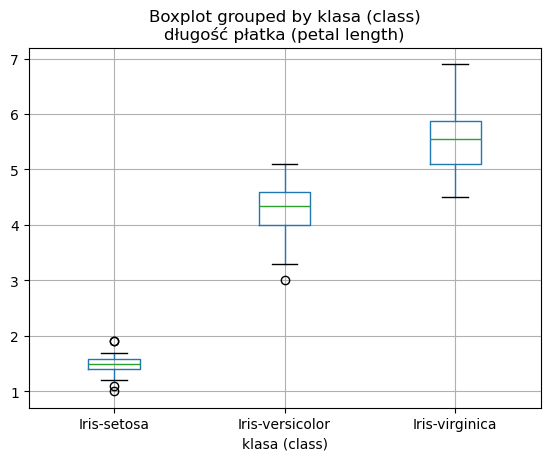

In [47]:
df.boxplot(column='długość płatka (petal length)', by='klasa (class)')

In [56]:
df.groupby('klasa (class)', as_index=False).agg({'długość płatka (petal length)': ['min', 'mean', 'median', 'max', 'std', 'count']})

klasa (class) długość płatka (petal length)                               \
                                             min   mean median  max       std   
0      Iris-setosa                           1.0  1.464   1.50  1.9  0.173511   
1  Iris-versicolor                           3.0  4.260   4.35  5.1  0.469911   
2   Iris-virginica                           4.5  5.552   5.55  6.9  0.551895   

         
  count  
0    50  
1    50  
2    50

### Szerokość płatka, a klasa irysa

<Axes: title={'center': 'szerokość płatka (petal width)'}, xlabel='klasa (class)'>

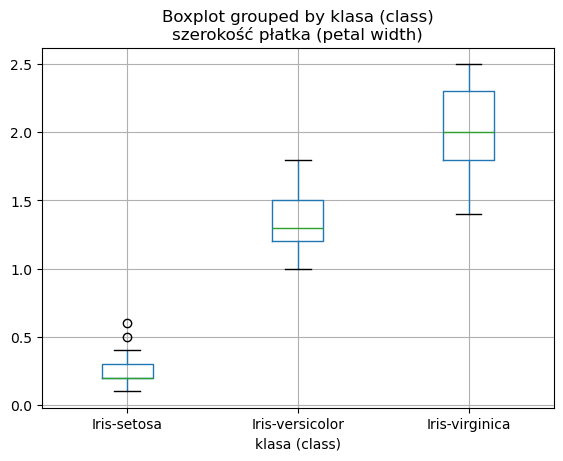

In [48]:
df.boxplot(column='szerokość płatka (petal width)', by='klasa (class)')

In [57]:
df.groupby('klasa (class)', as_index=False).agg({'szerokość płatka (petal width)': ['min', 'mean', 'median', 'max', 'std', 'count']})

klasa (class) szerokość płatka (petal width)                     \
                                              min   mean median  max   
0      Iris-setosa                            0.1  0.244    0.2  0.6   
1  Iris-versicolor                            1.0  1.326    1.3  1.8   
2   Iris-virginica                            1.4  2.026    2.0  2.5   

                   
        std count  
0  0.107210    50  
1  0.197753    50  
2  0.274650    50

<Axes: title={'center': 'długość kielicha (sepal length)'}, xlabel='klasa (class)'>

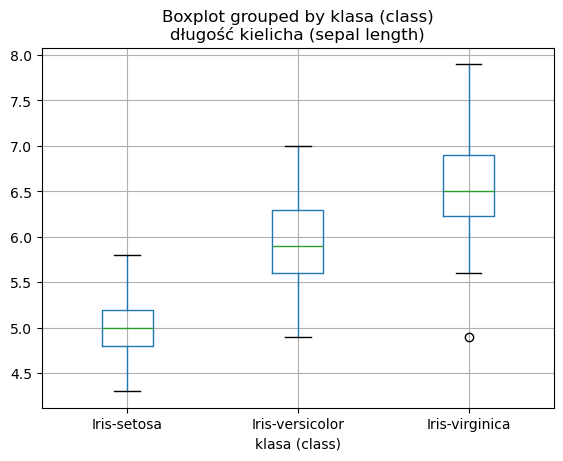

In [58]:
df.boxplot(column='długość kielicha (sepal length)', by='klasa (class)')

In [59]:
df.groupby('klasa (class)', as_index=False).agg({'długość kielicha (sepal length)': ['min', 'mean', 'median', 'max', 'std', 'count']})

klasa (class) długość kielicha (sepal length)                     \
                                               min   mean median  max   
0      Iris-setosa                             4.3  5.006    5.0  5.8   
1  Iris-versicolor                             4.9  5.936    5.9  7.0   
2   Iris-virginica                             4.9  6.588    6.5  7.9   

                   
        std count  
0  0.352490    50  
1  0.516171    50  
2  0.635880    50

## Analiza zależności

In [63]:
df[["długość kielicha (sepal length)", "szerokość kielicha (sepal width)", "długość płatka (petal length)", "szerokość płatka (petal width)"]].corr()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
długość kielicha (sepal length),1.000000,-0.109369,0.871754,0.817954
szerokość kielicha (sepal width),-0.109369,1.000000,-0.420516,-0.356544
długość płatka (petal length),0.871754,-0.420516,1.000000,0.962757
szerokość płatka (petal width),0.817954,-0.356544,0.962757,1.000000


## Wnioski
W wyniku analizy danych otrzymaliśmy następujące dane:
* Iris-setosa ma*ą**:
- najkrótsze łodygi z badanych gatunków irysów
- najmniejszą rozpiętość długości łodyg
- łodygi o średniej długości 5cm
- najszersze kielichy  z badanych gatunków irysów
- kielichy o średniej szerokości 3,4cm
- najkrótsze płatki z badanych gatunków irysów
- płatki o średniej długości cm
- najwęższe płatki z badanych gatunków irysów
- płatki o średniej szerokości 0,2cm
- najkrótsze kielichy z badanych gatunków irysów
- kielichy o średniej d**ości 5cm

1. Iris-v**ersicolor mają:
- łodygi o średniej długości 5,9cm
- najwęższe kielichy z badanych gatunków irysów
- kielichy o średniej szerokości 2,8cm
- płatki o średniej długości 4,3cm
- płatki o średniej szerokości 1,3cm
- kielichy o śre
**j długości 5,9cm

**1. Iris-virginica mają:
- najdłuższe łodygi z badanych gatunków irysów
- największą rozpiętość długości łodyg
- łodygi o średniej długości 6,5cm
- kielichy o średniej szerokości 3cm
- najdłuższe płatki z badanych gatunków irysów
- płatki o średniej długości 5,5cm
- najszersze płatki z badanych gatunków irysów
- płatki o średniej szerokości 2cm
- najdłuższe kielichy z badanych gatunków irysów
- kielichy o średniej długości 6,5cm o średniej długości 6,5cm

1. Szerokość płatka jest silnie skorelowana z jego długością. Wraz ze wzrostem szerokości płatka, wzrasta jego długość
1. Długość kielicha jest silnie skorelowana z długością i szerokością płatka. Im kielich dłuższy, tym płatek dłuższy i szerszyielichy o średniej długości 6,5cm